In [1]:
#core python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#ot library
import ot

#imort local files
from utils import simulate_dataset, format_dataset
from repairs import DI_list_geometric_repair, DI_list_random_repair, geometric_repair, DI_list_geometric_repair_data, DI_list_merge_repair_data, merger_repair
from disparate import *


#tools for data visualization
from sklearn.manifold import TSNE
#models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#tools for model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [2]:
#colours 
blue1 = '#1f77b4' # darker blue
blue2 = '#aec7e8' # lighter blue

# Two shades of red
red1 = '#d62728' # darker red
red2 = '#ff9896' # lighter red



In [3]:
#import adult dataset
adult_df = pd.read_csv('adult.csv')

# print(adult_df.head())


#replace income column with 0 and 1
adult_df['income'] = adult_df['income'].replace({'<=50K': 0, '>50K': 1})

#unique values in each income column
adult_df['income'].unique()




array([0, 1], dtype=int64)

In [4]:
#split into X for male and female 

df_male = adult_df[adult_df['gender'] == 'Male']
df_female  =  adult_df[adult_df['gender'] == 'Female']

# print(df_male.shape)
# print(df_female.shape)

#sample 15000 rows from each df
df_male = df_male.sample(n=15000)
df_female = df_female.sample(n=15000)



DI = (len(df_female[df_female['income'] ==1]))/len(df_male[df_male['income'] ==1])
print(DI)


0.36054421768707484


In [5]:
#list non numeric columns
#list non numeric columns

non_numeric_cols = adult_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

df_new = adult_df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race',  'native-country'], axis=1)
df_new = df_new.drop(['fnlwgt'], axis=1)



#split into train and test

# X_train_g, X_test_g, y_train, y_test = train_test_split(df_new.drop(['income'], axis=1), df_new['income'], test_size=0.3, random_state=69)

#remove gender column remeber the index

# X_train =X_train_g.drop(['gender'], axis=1)
# X_test =   X_test_g.drop(['gender'], axis=1)


# array(['Male', 'Female'], dtype=object)
X0 = df_new[df_new['gender'] == 'Female']
X1  = df_new[df_new['gender'] == 'Male']

# Split y_test based on gender
y0 = df_new.loc[df_new['gender'] == 'Female']
y1 = df_new.loc[df_new['gender'] == 'Male']

#drop gender column
X0  = X0.drop(['gender'], axis=1)
X1  = X1.drop(['gender'], axis=1)


#drop gender column
X0_train, X0_test, y0_train, y0_test = train_test_split(X0.drop(['income'], axis=1), X0['income'], test_size=0.3, random_state=69)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.drop(['income'], axis=1), X1['income'], test_size=0.3, random_state=69)


print(X0_train.head())

#train logistic regression model on train data
clf = LogisticRegression()
clf.fit(X0_train, y0_train)
# Extract the coefficients
beta0 = []
intercept0= clf.intercept_
for length in range(len(clf.coef_[0])):
    beta0.append(clf.coef_[0][length])

print ('intercept', clf.intercept_)

print ('beta0')
print (beta0)



#predict on test data
Y0 = clf.predict(X0_test)

#acuracy
print(metrics.accuracy_score(y0_test, Y0))

#train logistic regression model on train data
clf = LogisticRegression()
clf.fit(X1_train, y1_train)
# Extract the coefficients
beta1 = []
intercept1= clf.intercept_


for length in range(len(clf.coef_[0])):
    beta1.append(clf.coef_[0][length])

print ('intercept1', intercept1)  

print ('beta1')
print (beta1)
Y1 = clf.predict(X1_test)

#acuracy
print(metrics.accuracy_score(y1_test, Y1))




       age  educational-num  capital-gain  capital-loss  hours-per-week
42417   44               13             0             0              32
34310   44               11             0             0              40
20191   48                9             0             0              30
45615   27               10             0             0              60
23551   49               10             0             0              60
intercept [-8.32097895]
beta0
[0.0283525492064916, 0.3650299292603575, 0.00035028469721592694, 0.0007725420407877901, 0.022383847916111956]
0.9075751337999176
intercept1 [-8.179993]
beta1
[0.04644809540115112, 0.33421427802467, 0.0003135508461166655, 0.0006436183799079584, 0.03813289120291542]
0.7730474732006125


In [6]:
#data repair with geometric repair


X,Y = format_dataset(X0_test, X1_test, Y0 , Y1) 



# X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X[:,1:])
# X_embedded = np.concatenate([X[:,:1], X_embedded], axis=1)
# X_embedded.shape



In [7]:
# X,Y = format_dataset(X0, X1, Y0, Y1)
# print(X.shape, Y.shape)
# plt.figure(1, (5, 5))
# plt.plot(X_embedded[X_embedded[:,0] == 0][:, 1], X_embedded[X_embedded[:,0] == 0][:, 2], '+')
# plt.plot(X_embedded[X_embedded[:,0] == 1][:, 1], X_embedded[X_embedded[:,0] == 1][:, 2], 'x')
# plt.show()

In [8]:
X1_test.shape

(9795, 5)

In [9]:
X0_test =X0_test.sample(n=3000)
X1_test =X1_test.sample(n=3000)

X0_test = X0_test.to_numpy()
X1_test = X1_test.to_numpy()


In [15]:

iter = 100
DI_geometric, X0r, X1r, y0r, y1r=DI_list_geometric_repair_data(X0_test,X1_test, beta0,beta1, intercept0, intercept1, iter)
DI_geometric= np.array(DI_geometric)

    


c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [11]:
DI_geometric.shape

(10, 4)

<Figure size 1000x800 with 0 Axes>

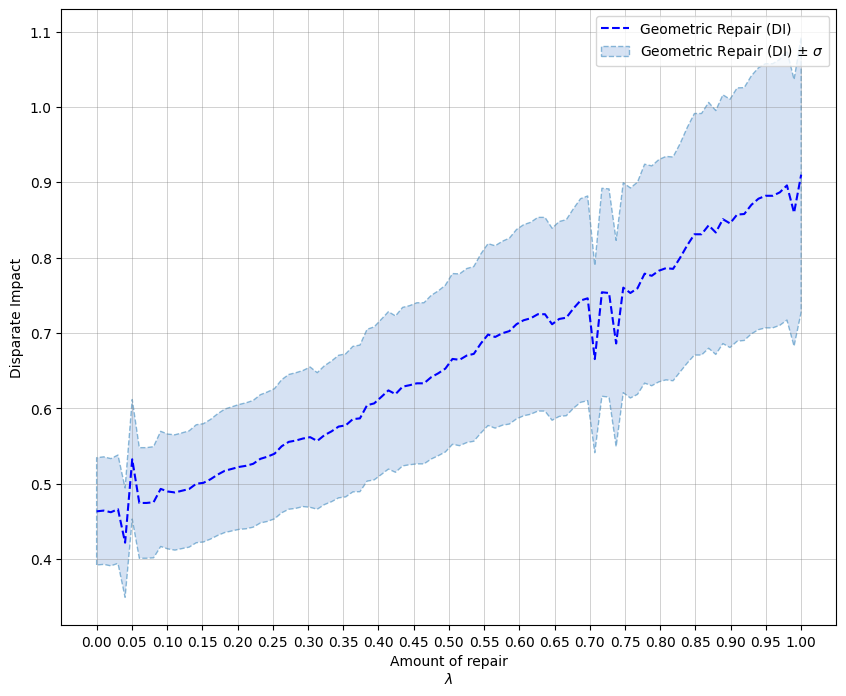

In [29]:
#---format the repaired dataset
fig = plt.figure(figsize=(10, 8))


alpha = np.linspace(0,1,iter)


fig = plt.figure(figsize=(10, 8))
plt.plot(alpha,DI_geometric[:,1], label = 'Geometric Repair (DI)', color = 'blue', linestyle = 'dashed')
plt.fill_between(alpha, DI_geometric[:,2], DI_geometric[:,0], alpha=0.5, edgecolor=blue1, facecolor=blue2, linewidth=1, antialiased=True, linestyle = 'dashed', label=r'Geometric Repair (DI) ± $\sigma$')


plt.xlabel('Amount of repair\n'+r'$\lambda$')
plt.ylabel('Disparate Impact')
plt.legend()
# generate a sequence of 5 evenly spaced numbers between 0 and 4
grid_pos = np.arange(0, 1.05, 0.05)

# draw vertical grid lines at the specified positions
plt.grid(axis='both', color='grey', linewidth=.5, linestyle='-', which='major', alpha=0.5)
plt.gca().set_xticks(grid_pos, minor=False)
plt.show()



In [18]:
def sigmoid(x):
    x = np.clip(x, -50, 50)
    return 1 / (1 + np.exp(-x))


In [19]:
def merge_1(mu, mu2, cov , cov2, weights):


    alpha = (weights[0])**2/(weights[0]+weights[1])**2
    #alpha = (weights[0])/(weights[0]+weights[1])

    mu_m = (weights[0]*mu + weights[1]*mu2)/(weights[0]+weights[1])
    #cov_m = (weights[0]*cov + weights[1]*cov2 + weights[0]*weights[1]/(weights[0]+weights[1])*(mu-mu2).dot((mu-mu2).T))/(weights[0]+weights[1])
    cov_m  = alpha*cov + (1-alpha)*cov2
    weight_m = weights[0]+weights[1]

    return mu_m, cov_m, weight_m

In [20]:
def merger_repair(X0,X1, alpha): 

    #find the mean and covariance of the two datasets
    mu = np.mean(X0, axis=0)
    cov = np.cov(X0.T)
    mu2 = np.mean(X1, axis=0)
    cov2 = np.cov(X1.T)

    #find the weights of the two datasets
    weights = np.array([X0.shape[0], X1.shape[0]])
    weights = weights/np.sum(weights)

    mu_m, cov_m, weights_m  = merge_1(mu, mu2, cov , cov2, weights)

    A_m = np.linalg.cholesky(cov_m)
    d = np.shape(mu_m)[0]


    X0r = np.zeros((len(X0),d)) 
    for i in range (len(X0)):

            r = np.random.rand()
            if r < alpha:
                #step 1: zero the mean
                x = X0[i,:] - mu
                #step 2: rotate the data
                x = np.dot(A_m, x)
                #step 3: scale the data
                x = mu_m + x
                X0r[i,:] = x
            else:
                X0r[i,:] = X0[i,:]
            
    X1r = np.zeros((len(X1),d))

    for i in range (len(X1)):
            
            r = np.random.rand()
            if r < alpha:
                    #step 1: zero the mean
                    x = X1[i,:] - mu2
                    #step 2: rotate the data
                    x = np.dot(A_m, x)
                    #step 3: scale the data
                    x = mu_m + x
                    X1r[i,:] = x
            else:
                    X1r[i,:] = X1[i,:]

    return X0r, X1r

In [25]:
def DI_list_merge_repair_data_1(X0, X1, beta0, beta1, intercept0, intercept1,iter):
    DIs = []
    alphas = np.linspace(0,1,iter)
    for alpha in alphas:
        X0r, X1r = merger_repair(X0, X1, alpha)
        # log odds of positive outcome
        y0 = sigmoid(X0r.dot(beta0) + intercept0)
        #hist yo
        # plt.hist(y0,bins = 100)
        # plt.show()
        # # log odds of positive outcome
        y1 = sigmoid(X1r.dot(beta1) + intercept1)
        # plt.hist(y1,bins = 100)
        # plt.show()

        X,Y = format_dataset(X0r, X1r, y0, y1)

    
        #covert Y to 0 and 1
        Y = np.where(Y > 0.5, 1, 0)

        #train logistic regression
        clf = LogisticRegression(random_state=69).fit(X[:, 1:], Y)
        Y_pred = clf.predict(X[:, 1:])


        DIs.append(disparate(X,Y_pred,0))
        

    return DIs

In [26]:
#---format the repaired 
DI_merge=DI_list_merge_repair_data_1(X0_test,X1_test, beta0,beta1, intercept0, intercept1, iter)
DI_merge= np.array(DI_merge)


c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

<Figure size 1000x800 with 0 Axes>

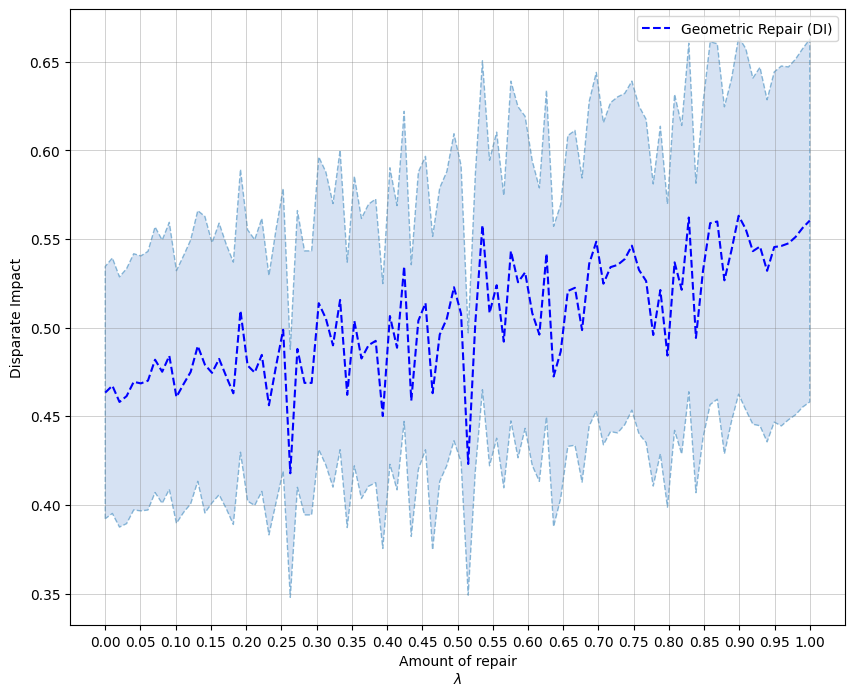

In [27]:
#---format the repaired dataset
fig = plt.figure(figsize=(10, 8))


alpha = np.linspace(0,1,iter)


fig = plt.figure(figsize=(10, 8))
plt.plot(alpha,DI_merge[:,1], label = 'Geometric Repair (DI)', color = 'blue', linestyle = 'dashed')
plt.fill_between(alpha, DI_merge[:,2], DI_merge[:,0], alpha=0.5, edgecolor=blue1, facecolor=blue2, linewidth=1, antialiased=True, linestyle = 'dashed')


plt.xlabel('Amount of repair\n'+r'$\lambda$')
plt.ylabel('Disparate Impact')
plt.legend()
# generate a sequence of 5 evenly spaced numbers between 0 and 4
grid_pos = np.arange(0, 1.05, 0.05)

# draw vertical grid lines at the specified positions
plt.grid(axis='both', color='grey', linewidth=.5, linestyle='-', which='major', alpha=0.5)
plt.gca().set_xticks(grid_pos, minor=False)
plt.show()